In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-sci-topic/SampleSubmission.csv
/kaggle/input/nlp-sci-topic/train.csv
/kaggle/input/nlp-sci-topic/test.csv


In [2]:
sub=pd.read_csv('../input/nlp-sci-topic/SampleSubmission.csv')

# **1. 데이터 불러오기**

In [3]:
train=pd.read_csv('../input/nlp-sci-topic/train.csv') #,encoding='ISO-8859-1'
train

,ID,TITLE,ABSTRACT,label
0,1,Detecting the impact of public transit on the ...,"In many developing countries, public transit...",0
1,2,Is Proxima Centauri b habitable? -- A study of...,We address the important question of whether...,1
2,3,Verifying Security Protocols using Dynamic Str...,Current formal approaches have been successf...,0
3,4,Scenic: Language-Based Scene Generation,Synthetic data has proved increasingly usefu...,0
4,5,Near-Optimal Discrete Optimization for Experim...,The experimental design problem concerns the...,0
...,...,...,...,...
15467,15468,Connections on parahoric torsors over curves,We define parahoric $\cG$--torsors for certa...,2
15468,15469,Higher-degree Smoothness of Perturbations I,"In this paper and its sequels, we give an un...",2
15469,15470,Nonequilibrium mode-coupling theory for dense ...,The physics of active systems of self-propel...,1
15470,15471,SLAMBooster: An Application-aware Controller f...,Simultaneous Localization and Mapping (SLAM)...,0


In [4]:
test=pd.read_csv('../input/nlp-sci-topic/test.csv')
test

,ID,TITLE,ABSTRACT
0,1,An analytic resolution to the competition betw...,A near pristine atomic cooling halo close to...
1,2,Attention-based Natural Language Person Retrieval,Following the recent progress in image class...
2,3,Asymptotics of multivariate contingency tables...,We consider the asymptotic distribution of a...
3,4,Discriminant of the ordinary transversal singu...,"Consider a space X with the singular locus, ..."
4,5,Pharmacokinetics Simulations for Studying Corr...,A key objective in two phase 2b AMP clinical...
...,...,...,...
4839,4840,Tight contact structures on Seifert surface co...,We consider complements of standard Seifert ...
4840,4841,Graded components of Local cohomology modules II,Let $A$ be a commutative Noetherian ring con...
4841,4842,Levitation of non-magnetizable droplet inside ...,The central theme of this work is that a sta...
4842,4843,Helicity of convective flows from localized he...,Experimental and numerical study of the stea...


# **2. 데이터 전처리**

In [5]:
train_sum_data=train['TITLE']+ train['ABSTRACT']
train_sum_data

0        Detecting the impact of public transit on the ...
1        Is Proxima Centauri b habitable? -- A study of...
2        Verifying Security Protocols using Dynamic Str...
3        Scenic: Language-Based Scene Generation  Synth...
4        Near-Optimal Discrete Optimization for Experim...
                               ...                        
15467    Connections on parahoric torsors over curves  ...
15468    Higher-degree Smoothness of Perturbations I  I...
15469    Nonequilibrium mode-coupling theory for dense ...
15470    SLAMBooster: An Application-aware Controller f...
15471    Network Inference from a Link-Traced Sample us...
Length: 15472, dtype: object

In [6]:
test_sum_data=test['TITLE']+ test['ABSTRACT']
test_sum_data

0       An analytic resolution to the competition betw...
1       Attention-based Natural Language Person Retrie...
2       Asymptotics of multivariate contingency tables...
3       Discriminant of the ordinary transversal singu...
4       Pharmacokinetics Simulations for Studying Corr...
                              ...                        
4839    Tight contact structures on Seifert surface co...
4840    Graded components of Local cohomology modules ...
4841    Levitation of non-magnetizable droplet inside ...
4842    Helicity of convective flows from localized he...
4843    Low frequency spectral energy distributions of...
Length: 4844, dtype: object

In [7]:
all_sum_data=pd.concat([train_sum_data,test_sum_data],ignore_index=True)
all_sum_data

0        Detecting the impact of public transit on the ...
1        Is Proxima Centauri b habitable? -- A study of...
2        Verifying Security Protocols using Dynamic Str...
3        Scenic: Language-Based Scene Generation  Synth...
4        Near-Optimal Discrete Optimization for Experim...
                               ...                        
20311    Tight contact structures on Seifert surface co...
20312    Graded components of Local cohomology modules ...
20313    Levitation of non-magnetizable droplet inside ...
20314    Helicity of convective flows from localized he...
20315    Low frequency spectral energy distributions of...
Length: 20316, dtype: object

In [8]:
review0=pd.concat([train_sum_data, test_sum_data],ignore_index=True)
review0

0        Detecting the impact of public transit on the ...
1        Is Proxima Centauri b habitable? -- A study of...
2        Verifying Security Protocols using Dynamic Str...
3        Scenic: Language-Based Scene Generation  Synth...
4        Near-Optimal Discrete Optimization for Experim...
                               ...                        
20311    Tight contact structures on Seifert surface co...
20312    Graded components of Local cohomology modules ...
20313    Levitation of non-magnetizable droplet inside ...
20314    Helicity of convective flows from localized he...
20315    Low frequency spectral energy distributions of...
Length: 20316, dtype: object

# **3. Tokenizer: fit_on_texts**

In [9]:
from keras.preprocessing.text import Tokenizer
tk=Tokenizer()
tk.fit_on_texts(review0)

In [10]:
tk.word_index

{'the': 1,
 'of': 2,
 'a': 3,
 'and': 4,
 'in': 5,
 'to': 6,
 'we': 7,
 'for': 8,
 'is': 9,
 'that': 10,
 'with': 11,
 'on': 12,
 'this': 13,
 'by': 14,
 'are': 15,
 'as': 16,
 'an': 17,
 'from': 18,
 'be': 19,
 'which': 20,
 'data': 21,
 'can': 22,
 'our': 23,
 'model': 24,
 'based': 25,
 'at': 26,
 '1': 27,
 'using': 28,
 'it': 29,
 'learning': 30,
 'show': 31,
 '2': 32,
 'time': 33,
 'these': 34,
 'results': 35,
 'two': 36,
 'paper': 37,
 'or': 38,
 'such': 39,
 'method': 40,
 'n': 41,
 'also': 42,
 'problem': 43,
 'have': 44,
 'models': 45,
 'between': 46,
 'has': 47,
 'network': 48,
 'approach': 49,
 'algorithm': 50,
 'not': 51,
 'one': 52,
 'new': 53,
 'system': 54,
 'networks': 55,
 'study': 56,
 'methods': 57,
 'their': 58,
 'its': 59,
 'analysis': 60,
 'proposed': 61,
 'high': 62,
 'systems': 63,
 '0': 64,
 'used': 65,
 'non': 66,
 'large': 67,
 'state': 68,
 'different': 69,
 'number': 70,
 'both': 71,
 'when': 72,
 'k': 73,
 'performance': 74,
 'more': 75,
 'well': 76,
 'ord

In [11]:
len(tk.word_index)

56272

In [12]:
tk.word_counts

OrderedDict([('detecting', 362),
             ('the', 204729),
             ('impact', 822),
             ('of', 135663),
             ('public', 346),
             ('transit', 153),
             ('on', 27758),
             ('transmission', 497),
             ('epidemics', 38),
             ('in', 69818),
             ('many', 2789),
             ('developing', 284),
             ('countries', 93),
             ('plays', 226),
             ('an', 17532),
             ('important', 1714),
             ('role', 791),
             ('daily', 104),
             ('life', 301),
             ('however', 2906),
             ('few', 809),
             ('existing', 1850),
             ('methods', 4783),
             ('have', 6192),
             ('considered', 951),
             ('influence', 568),
             ('their', 4763),
             ('models', 5948),
             ('this', 24576),
             ('work', 3409),
             ('we', 48656),
             ('present', 3883),
             ('a', 856

# **4. text_to_sequences**

In [13]:
tseq=tk.texts_to_sequences(review0) 

In [14]:
tseq[0]

[1313,
 1,
 567,
 2,
 1367,
 2597,
 12,
 1,
 990,
 2,
 6154,
 5,
 126,
 1616,
 3599,
 1367,
 2597,
 1933,
 17,
 221,
 597,
 5,
 3355,
 1534,
 120,
 578,
 203,
 57,
 44,
 468,
 1,
 866,
 2,
 1367,
 2597,
 5,
 58,
 45,
 5,
 13,
 97,
 7,
 80,
 3,
 900,
 1338,
 809,
 2,
 1,
 2782,
 3055,
 145,
 2,
 1,
 591,
 10,
 1660,
 71,
 3731,
 5,
 4235,
 39,
 16,
 97,
 4235,
 4,
 6872,
 4,
 1367,
 2597,
 39,
 16,
 6978,
 4,
 5672,
 5,
 75,
 1755,
 7,
 196,
 3,
 191,
 2,
 1638,
 1478,
 3543,
 6,
 102,
 4235,
 28,
 1367,
 2597,
 4,
 244,
 1367,
 2597,
 109,
 1,
 2782,
 3055,
 145,
 3,
 163,
 354,
 118,
 9,
 61,
 1111,
 1617,
 25,
 8634,
 4,
 1,
 1367,
 2597,
 25,
 8634,
 5,
 1,
 1960,
 1077,
 7,
 340,
 1,
 1367,
 2597,
 7526,
 1091,
 189,
 35254,
 5,
 1,
 2782,
 3055,
 145,
 2,
 1,
 591,
 4,
 1601,
 1,
 567,
 2,
 1,
 1367,
 2597,
 7526,
 1091,
 189,
 14,
 2237,
 1,
 1071,
 2,
 5893,
 1421,
 867,
 8,
 842,
 39,
 16,
 1367,
 2597,
 4,
 5894,
 2794,
 289,
 1268,
 4,
 1411,
 23,
 284,
 35,
 935,
 10,
 1638,

In [15]:
review0[0] #위와 동일한 문

'Detecting the impact of public transit on the transmission of epidemics  In many developing countries, public transit plays an important role in daily\nlife. However, few existing methods have considered the influence of public\ntransit in their models. In this work, we present a dual-perspective view of\nthe epidemic spreading process of the individual that involves both\ncontamination in places (such as work places and homes) and public transit\n(such as buses and trains). In more detail, we consider a group of individuals\nwho travel to some places using public transit, and introduce public transit\ninto the epidemic spreading process. A novel modeling framework is proposed\nconsidering place-based infections and the public-transit-based infections. In\nthe urban scenario, we investigate the public transit trip contribution rate\n(PTTCR) in the epidemic spreading process of the individual, and assess the\nimpact of the public transit trip contribution rate by evaluating the volume 

# **5. pad_sequences**

In [16]:
from keras.preprocessing.sequence import pad_sequences
tpad=pad_sequences(tseq)

In [17]:
tpad.shape

(20316, 467)

In [18]:
tpad=pad_sequences(tseq, maxlen=200, padding='pre')#post or pre # maxlen 을 넘는  sequence는 잘라낸다. # 길이조정

In [19]:
tpad.shape

(20316, 200)

# **6. 데이터 분리 train/test**

In [20]:
train0=tpad[:15472]
test0=tpad[15472:]

# **7.target 설정**

0: Computer Science, 1: Physics, 2: Mathematics, 3: Statistics

In [21]:
train['label'].value_counts() #훈련용

0    6539
1    4203
2    3349
3    1381
Name: label, dtype: int64

데이터 확인

In [22]:
train[train['label']==0]

,ID,TITLE,ABSTRACT,label
0,1,Detecting the impact of public transit on the ...,"In many developing countries, public transit...",0
2,3,Verifying Security Protocols using Dynamic Str...,Current formal approaches have been successf...,0
3,4,Scenic: Language-Based Scene Generation,Synthetic data has proved increasingly usefu...,0
4,5,Near-Optimal Discrete Optimization for Experim...,The experimental design problem concerns the...,0
16,17,Upper bounds on the smallest size of a saturat...,In a projective plane $\Pi_{q}$ (not necessa...,0
...,...,...,...,...
15460,15461,Sleep Stage Classification Based on Multi-leve...,This paper proposes a practical approach for...,0
15464,15465,Implementation and Analysis of QUIC for MQTT,Transport and security protocols are essenti...,0
15466,15467,Feature analysis of multidisciplinary scientif...,The features of collaboration patterns are o...,0
15470,15471,SLAMBooster: An Application-aware Controller f...,Simultaneous Localization and Mapping (SLAM)...,0


In [23]:
train[train['label']==1]

,ID,TITLE,ABSTRACT,label
1,2,Is Proxima Centauri b habitable? -- A study of...,We address the important question of whether...,1
5,6,Charge transport through a single molecule of ...,Fullerenes have attracted interest for their...,1
6,7,The effect of the virial state of molecular cl...,A set of Smoothed Particle Hydrodynamics sim...,1
7,8,Birth of the GUP and its effect on the entropy...,"In this paper, the origin of the generalized...",1
8,9,Abdominal aortic aneurysms and endovascular se...,Endovascular sealing is a new technique for ...,1
...,...,...,...,...
15450,15451,Inverse statistical problems: from the inverse...,Inverse problems in statistical physics are ...,1
15462,15463,Gapless quantum spin chains: multiple dynamics...,We study gapless quantum spin chains with sp...,1
15463,15464,A measurement of the z = 0 UV background from ...,We report the detection of extended Halpha e...,1
15465,15466,Gentle heating by mixing in cooling flow clusters,We analyze three-dimensional hydrodynamical ...,1


In [24]:
train[train['label']==2]

,ID,TITLE,ABSTRACT,label
9,10,On tamed almost complex four manifolds,This paper proves that on any tamed closed a...,2
12,13,Asymptotic behavior of semilinear parabolic eq...,We study topological structure of the $\omeg...,2
18,19,Gorenstein homological properties of tensor rings,Let $R$ be a two-sided noetherian ring and $...,2
41,42,Random Perturbations of Matrix Polynomials,A sum of a large-dimensional random matrix p...,2
48,49,Pure $Σ_2$-Elementarity beyond the Core,We display the entire structure ${\cal R}_2$...,2
...,...,...,...,...
15457,15458,Semi-supervised learning,Semi-supervised learning deals with the prob...,2
15459,15460,Topological conjugacy of topological Markov sh...,We will characterize topologically conjugate...,2
15461,15462,Discrete Invariants of Generically Inconsisten...,"Let $ \mathcal{A}_1, \ldots, \mathcal{A}_k $...",2
15467,15468,Connections on parahoric torsors over curves,We define parahoric $\cG$--torsors for certa...,2


In [25]:
train[train['label']==3]

,ID,TITLE,ABSTRACT,label
11,12,A Hierarchical Max-infinitely Divisible Proces...,Understanding the spatial extent of extreme ...,3
13,14,Estimation of Component Reliability in Coheren...,The first step in statistical reliability st...,3
25,26,DAGs with NO TEARS: Continuous Optimization fo...,Estimating the structure of directed acyclic...,3
28,29,Model Averaging and its Use in Economics,The method of model averaging has become an ...,3
80,81,Sparse-Group Bayesian Feature Selection Using ...,We present a Bayesian method for feature sel...,3
...,...,...,...,...
15357,15358,A Study of Reinforcement Learning for Neural M...,Recent studies have shown that reinforcement...,3
15381,15382,Policy Evaluation and Optimization with Contin...,We study the problem of policy evaluation an...,3
15408,15409,Long-Term Load Forecasting Considering Volatil...,Long-term load forecasting plays a vital rol...,3
15439,15440,Selective inference after likelihood- or test-...,Statistical inference after model selection ...,3


In [26]:
target= train['label'][:15472]

In [27]:
train_y=[]
for i in range(len(target)):
    if   target[i]==0: train_y.append(0)  #0면 0붙이고
    elif target[i]==1: train_y.append(1) # 1이면 1을 붙여 리스트를 만든다.
    elif target[i]==2: train_y.append(2)
    elif target[i]==3: train_y.append(3)
#ist로 만든다.

In [28]:
train_y=np.array(train_y)
np.unique(train_y, return_counts=True)

(array([0, 1, 2, 3]), array([6539, 4203, 3349, 1381]))

In [29]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.layers import Bidirectional, Dropout

# **8. 모델설정 SimpleRNN**

In [30]:
'''
model=Sequential()
model.add(Embedding(len(tk.word_index)+1, 300, input_length=400)) #단어종류:10,000여개, output vector의 크기:300개, input_length:400 문장의 크기가 400 
model.add(SimpleRNN(10))  #최종아웃풋 10개
model.add(Dense(512, activation = 'relu')) 
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(24, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))
model.summary()'''

"\nmodel=Sequential()\nmodel.add(Embedding(len(tk.word_index)+1, 300, input_length=400)) #단어종류:10,000여개, output vector의 크기:300개, input_length:400 문장의 크기가 400 \nmodel.add(SimpleRNN(10))  #최종아웃풋 10개\nmodel.add(Dense(512, activation = 'relu')) \nmodel.add(Dropout(0.3))\nmodel.add(Dense(128, activation = 'relu'))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(24, activation = 'relu'))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(10,activation='relu'))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(4, activation = 'softmax'))\nmodel.summary()"

In [31]:
'''model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='acc')'''

"model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='acc')"

In [32]:
'''hist=model.fit(train0, train_y, epochs=18, batch_size=1000) #자연어처리는 epchs를 적게, batch_size를 크게한다.'''

'hist=model.fit(train0, train_y, epochs=18, batch_size=1000) #자연어처리는 epchs를 적게, batch_size를 크게한다.'

# **LSTM**

In [33]:
from keras.layers import LSTM
'''
model1 = Sequential()
model1.add(Embedding(len(tk.word_index)+1, 300, input_length=210))
model1.add(LSTM(100))
model1.add(Dense(512, activation = 'relu')) 
model1.add(Dropout(0.3))
model1.add(Dense(128, activation = 'relu'))
model1.add(Dropout(0.3))
model1.add(Dense(24, activation = 'relu'))
model1.add(Dropout(0.3))
model1.add(Dense(10,activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(4, activation = 'softmax'))
model1.summary()'''

"\nmodel1 = Sequential()\nmodel1.add(Embedding(len(tk.word_index)+1, 300, input_length=210))\nmodel1.add(LSTM(100))\nmodel1.add(Dense(512, activation = 'relu')) \nmodel1.add(Dropout(0.3))\nmodel1.add(Dense(128, activation = 'relu'))\nmodel1.add(Dropout(0.3))\nmodel1.add(Dense(24, activation = 'relu'))\nmodel1.add(Dropout(0.3))\nmodel1.add(Dense(10,activation='relu'))\nmodel1.add(Dropout(0.3))\nmodel1.add(Dense(4, activation = 'softmax'))\nmodel1.summary()"

In [34]:
'''model1.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam', metrics='acc')'''
'''hist1=model1.fit(train0, train_y, epochs=18, batch_size=1000)'''

'hist1=model1.fit(train0, train_y, epochs=18, batch_size=1000)'

# **Bidierctional, Dropout**

In [35]:
'''
model2 = Sequential()
model2.add(Embedding(len(tk.word_index)+1, 300, input_length=467))
model2.add(Bidirectional(LSTM(100)))
#model2.add(Dropout(0.2))
model2.add(Dense(512, activation = 'relu')) 
model2.add(Dropout(0.4))
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.4))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dropout(0.4))
model2.add(Dense(32, activation = 'relu'))
model2.add(Dropout(0.4))
model2.add(Dense(16,activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(4, activation = 'softmax'))
model2.summary()'''

"\nmodel2 = Sequential()\nmodel2.add(Embedding(len(tk.word_index)+1, 300, input_length=467))\nmodel2.add(Bidirectional(LSTM(100)))\n#model2.add(Dropout(0.2))\nmodel2.add(Dense(512, activation = 'relu')) \nmodel2.add(Dropout(0.4))\nmodel2.add(Dense(128, activation = 'relu'))\nmodel2.add(Dropout(0.4))\nmodel2.add(Dense(64, activation = 'relu'))\nmodel2.add(Dropout(0.4))\nmodel2.add(Dense(32, activation = 'relu'))\nmodel2.add(Dropout(0.4))\nmodel2.add(Dense(16,activation='relu'))\nmodel2.add(Dropout(0.4))\nmodel2.add(Dense(4, activation = 'softmax'))\nmodel2.summary()"

In [36]:
#model2.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam', metrics='acc')
#hist2=model2.fit(train0, train_y, epochs=70, batch_size=1400)

# **GRU**

In [37]:
from keras.layers import GRU

model3 = Sequential()
model3.add(Embedding(len(tk.word_index)+1,300,input_length=200))
model3.add(Bidirectional(LSTM(20, return_sequences=True)))
model3.add(Bidirectional(LSTM(20,  return_sequences=True)))
model3.add(Bidirectional(LSTM(20,  return_sequences=True)))

model3.add(Bidirectional(LSTM(20,  return_sequences=False)))
#model3.add(Bidirectional(GRU(30)))
#model3.add(Dense(1024, activation = 'relu')) 
#model3.add(Dropout(0.3))
model3.add(Dense(512, activation = 'relu')) 
#model3.add(Dropout(0.3))
#model3.add(Dense(128, activation = 'relu'))
#model3.add(Dropout(0.3))
model3.add(Dense(35, activation = 'relu'))
#model3.add(Dropout(0.3))
#model3.add(Dense(10,activation='relu'))
#model3.add(Dropout(0.3))
model3.add(Dense(4, activation = 'softmax'))
model3.summary()

2022-06-14 05:55:32.671575: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 05:55:32.812880: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 05:55:32.813982: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-14 05:55:32.815436: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 300)          16881900  
_________________________________________________________________
bidirectional (Bidirectional (None, 200, 40)           51360     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200, 40)           9760      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200, 40)           9760      
_________________________________________________________________
bidirectional_3 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense (Dense)                (None, 512)               20992     
_________________________________________________________________
dense_1 (Dense)              (None, 35)                1

In [38]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer= 'RMSProp', metrics='acc')
hist3=model3.fit(train0, train_y, epochs=20, batch_size=8000)

Epoch 1/20


2022-06-14 05:55:38.540407: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-14 05:55:51.377348: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2/2 [==============================] - 16s 849ms/step - loss: 1.3771 - acc: 0.3307
Epoch 2/20
2/2 [==============================] - 2s 862ms/step - loss: 1.2919 - acc: 0.4226
Epoch 3/20
2/2 [==============================] - 2s 838ms/step - loss: 1.2586 - acc: 0.4226
Epoch 4/20
2/2 [==============================] - 2s 839ms/step - loss: 1.2167 - acc: 0.5059
Epoch 5/20
2/2 [==============================] - 2s 863ms/step - loss: 1.0660 - acc: 0.5657
Epoch 6/20
2/2 [==============================] - 2s 880ms/step - loss: 1.0865 - acc: 0.5543
Epoch 7/20
2/2 [==============================] - 2s 864ms/step - loss: 0.9304 - acc: 0.6384
Epoch 8/20
2/2 [==============================] - 2s 835ms/step - loss: 0.8123 - acc: 0.7311
Epoch 9/20
2/2 [==============================] - 2s 846ms/step - loss: 0.7101 - acc: 0.7972
Epoch 10/20
2/2 [==============================] - 2s 868ms/step - loss: 0.9316 - acc: 0.6376
Epoch 11/20
2/2 [==============================] - 2s 859ms/step - loss: 0.6119

In [39]:
result=model3.predict(test0)
result

array([[0.00211034, 0.9888076 , 0.00503986, 0.00404218],
       [0.9309463 , 0.00404686, 0.0014625 , 0.06354436],
       [0.03307812, 0.0788234 , 0.8629108 , 0.02518774],
       ...,
       [0.02129535, 0.94405335, 0.00617734, 0.02847388],
       [0.0058042 , 0.90928185, 0.07492305, 0.00999084],
       [0.00237997, 0.98821557, 0.00493873, 0.00446569]], dtype=float32)

In [40]:
result[0]

array([0.00211034, 0.9888076 , 0.00503986, 0.00404218], dtype=float32)

In [41]:
sub

,ID,label
0,1,-1
1,2,-1
2,3,-1
3,4,-1
4,5,-1
...,...,...
4839,4840,-1
4840,4841,-1
4841,4842,-1
4842,4843,-1


In [42]:
for i in range(4844):
    for j in range(4):
        if result[i][j]==np.max(result[i]):
            sub.iloc[i,1] = j
            break
sub.to_csv('imbd1.csv', index=False)
sub

,ID,label
0,1,1
1,2,0
2,3,2
3,4,2
4,5,0
...,...,...
4839,4840,0
4840,4841,2
4841,4842,1
4842,4843,1


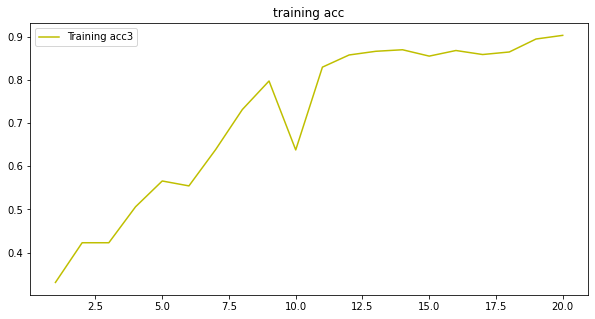

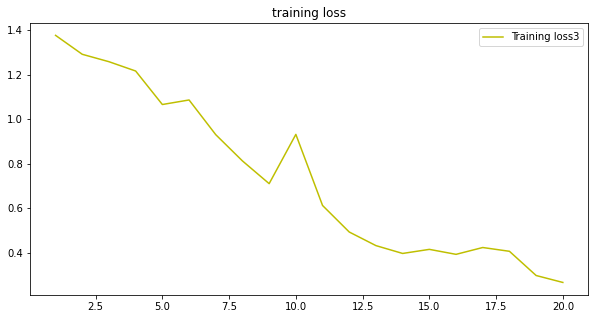

In [43]:
import matplotlib.pyplot as plt

#acc = hist.history['acc']
#acc1 = hist1.history['acc']
#acc2 = hist2.history['acc']
acc3 = hist3.history['acc']

#loss = hist.history['loss']
#loss1 = hist1.history['loss']
#loss2 = hist2.history['loss']
loss3 = hist3.history['loss']

epochs = range(1, len(acc3)+1)

fig= plt.figure(figsize=(10, 5))
#plt.xlim(1, len(acc2)+1)

#plt.plot(epochs, acc, 'b', label='Training acc')
#plt.plot(epochs, acc1, 'r', label='Training acc1')
#plt.plot(epochs, acc2, 'g', label='Training acc2')
plt.plot(epochs, acc3, 'y', label='Training acc3')
plt.title("training acc")
plt.savefig('imdb_acc')
plt.legend()

fig=plt.figure(figsize=(10, 5))
#plt.xlim(1,len(acc))

#plt.plot(epochs, loss, 'b', label='Training loss')
#plt.plot(epochs, loss1, 'r', label='Training loss1')
#plt.plot(epochs, loss2, 'g', label='Training loss2')
plt.plot(epochs, loss3, 'y', label='Training loss3')
plt.title("training loss")
plt.savefig('imdb_loss')
plt.legend()